In [8]:
import json, os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
print('Current working directory: ' + os.getcwd())
os.chdir('../downloads')
print('New working directory: ' + os.getcwd())

Current working directory: c:\Users\Boonchong\Desktop\defense_of_the_ancient\notebooks
New working directory: c:\Users\Boonchong\Desktop\defense_of_the_ancient\downloads


In [10]:
# db = []
# for f in os.listdir(os.getcwd()+ os.sep + '230821'):
#     file = open(os.getcwd() + os.sep + '230821' + os.sep + f)
#     data = json.load(file)
#     file.close()

In [12]:
data.keys()

dict_keys(['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'chat', 'cluster', 'cosmetics', 'dire_score', 'dire_team_id', 'draft_timings', 'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes', 'objectives', 'picks_bans', 'positive_votes', 'radiant_gold_adv', 'radiant_score', 'radiant_team_id', 'radiant_win', 'radiant_xp_adv', 'skill', 'start_time', 'teamfights', 'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt', 'series_id', 'series_type', 'players', 'patch', 'region', 'replay_url'])

In [20]:
db = []
for f in os.listdir(os.getcwd()+ os.sep + '230821'):
    file = open(os.getcwd() + os.sep + '230821' + os.sep + f)
    data = json.load(file)
    file.close()
    
    #ignoring errors by skipping
    if "error" in data.keys():
        continue
    # skip those with bots
    if data["human_players"] != 10:
        continue
    #skip those with no pick data
    if not data["picks_bans"]:
        continue
    
    #radiant = team 0
    win_team = 0
    if data["radiant_win"] == False:
        win_team = 1
    
    # get pick info
    picks = pd.DataFrame(data['picks_bans'])
    picks = picks[picks.is_pick] # drop bans
    picks = picks.sort_values('order')

    #adding last 2 picks to database
    db.append([data['match_id'],
              picks.iloc[-1].hero_id,
              picks.iloc[-1].team == win_team])
    
    db.append([data['match_id'],
              picks.iloc[-2].hero_id,
              picks.iloc[-2].team == win_team])
db = pd.DataFrame(db, columns = ['match_id','hero_id','win'])
    
# keep heroes >= 50
count = db.hero_id.value_counts()
keep = count[count > 50].index
db = db[db.hero_id.isin(keep)]

#getting winrate
winrate = db.groupby('hero_id')['win'].mean()
winrate = winrate.sort_values()

# changing hero id to name

heroes = pd.read_csv('./hero_data/hero_stats_23August2021.csv')[['name','hero_id']] #only want the name and hero_id column
lookup = {k:v[14:] for k,v in zip(heroes.hero_id, heroes.name)}

def convert2name(id):
    return[lookup[i] for i in id]
    
    

11     47
17     46
46     43
41     42
35     42
       ..
3       2
57      2
80      2
91      2
103     2
Name: hero_id, Length: 119, dtype: int64

Series([], Name: win, dtype: bool)
Series([], Name: win, dtype: bool)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

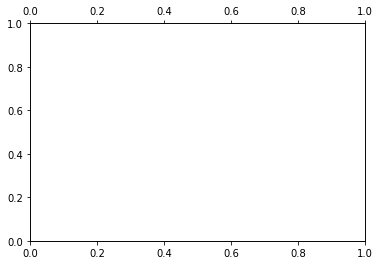

In [16]:
N = 10
tail10 = winrate.iloc[:N]
head10 = winrate.iloc[-N:]
print(head10)
print(tail10)

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.bar(range(N), 100 * head10.values)
ax1.bar(range(N), 100 * tail10.values)

ax1.set_xticks(range(N))
ax1.set_xticklabels(convert2name(tail10.index))
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(N))
ax2.set_xticklabels(convert2name(head10.index))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax1.set_ylabel('winrate')

ax1.set_title('Top/Bottom 10 winrate for last picks in 230821')
ax1.axhline(y=50, linestyle='--', color='red')
plt.show()

In [14]:
tail10

Series([], Name: win, dtype: bool)

In [15]:
head10

Series([], Name: win, dtype: bool)